### PCA

In [ ]:
import pandas as pd




In [ ]:

data = pd.read_csv("/content/drive/MyDrive/ML LABS/iris.csv")
data.head(5)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
data.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [ ]:
species = data["species"].tolist()
y = data["species"]


In [ ]:
X = data.drop("species", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_scaled = StandardScaler().fit_transform(X)

In [ ]:
x_scaled[:4]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

In [ ]:
import numpy as np

In [ ]:
#covariance matriix
features = x_scaled.T
covMatrix = np.cov(features)
covMatrix


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
# Eigen values and Eigen vector
values, vectors = np.linalg.eig(covMatrix)
print(values, "\n")
print(vectors)




[2.93808505 0.9201649  0.14774182 0.02085386] 

[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [ ]:
# Variance of each feature w.r.t eigen vlaues
explained_variance = []
for i in range(len(values)):
  res = values[i]/np.sum(values)*100
  explained_variance.append(res)

print("Variance of each feature", explained_variance)


Variance of each feature [72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


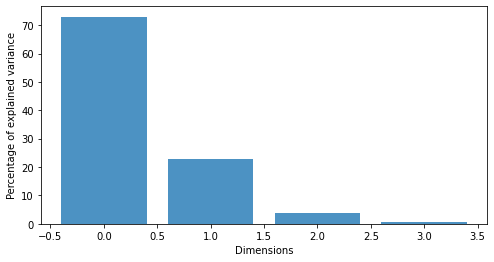

In [ ]:
# Bar graph
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.8)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Dimensions")

plt.show()


In [ ]:
# Based on the explained variances and the bar graph
# So we select first 2 features to be Principle Components

pro_1 = x_scaled.dot(vectors.T[0])
pro_2 = x_scaled.dot(vectors.T[1])


In [ ]:
result = pd.DataFrame(pro_1, columns=["PC1"])
result["PC2"] = pro_2
result["Y"] = y

result.head(10)


,PC1,PC2,Y
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1
5,-2.075631,-1.489178,1
6,-2.444029,-0.047644,1
7,-2.232847,-0.223148,1
8,-2.334640,1.115328,1
9,-2.184328,0.469014,1


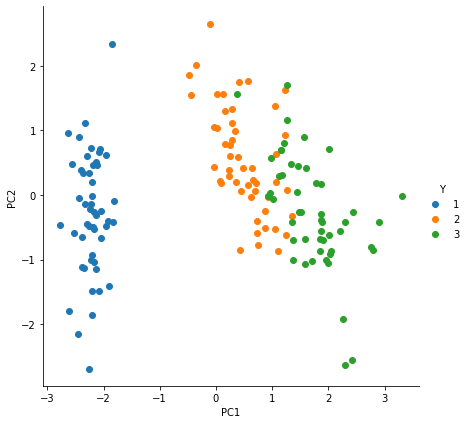

In [ ]:
# Scatter Plot
sns.FacetGrid(result, hue="Y", height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()


## Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML LABS/pima.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling
from matplotlib import rcParams


In [ ]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
744,13,153,88,37,140,40.6,1.174,39,0
1,1,85,66,29,0,26.6,0.351,31,0
130,4,173,70,14,168,29.7,0.361,33,1
351,4,137,84,0,0,31.2,0.252,30,0
426,0,94,0,0,0,0.0,0.256,25,0


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
X=data.drop("Outcome",axis=1)
y=data["Outcome"]


In [ ]:
scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y,stratify=y,test_size=0.10,random_state=42)

In [ ]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test,y_pred))

Accuracy: 0.8051948051948052


In [ ]:
feature_importances_df = pd.DataFrame(
    {"feature":list(X.columns),"importance":classifier.feature_importances_}
).sort_values("importance",ascending=False)


In [ ]:

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)


DecisionTreeClassifier()

In [ ]:
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy-DecisionTree :",accuracy_score(Y_test,Y_pred))


Accuracy-DecisionTree : 0.7662337662337663


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
import numpy as np


In [ ]:
X=np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]])
y=np.array([-1,-1,-1,1,1,1])


In [ ]:
l=SVC(C=1e5,kernel='linear')
l.fit(X,y)


SVC(C=100000.0, kernel='linear')

In [ ]:
print('w = ',l.coef_)
print('b = ',l.intercept_)
print('Indices of support vectors= ',l.support_)
print('Support vectors= ')
print(l.support_vectors_)
print('No. of support vectors fro each class= ',l.n_support_)
print('coefficient of support vectors in decision function= ',np.abs(l.dual_coef_))


w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors=  [2 3]
Support vectors= 
[[ 2.  3.]
 [ 6. -1.]]
No. of support vectors fro each class=  [1 1]
coefficient of support vectors in decision function=  [[0.0625 0.0625]]


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML LABS/glass.csv')
data.head()


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
x=data.drop('Type',axis=1)
y=data.Type


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [ ]:
linear=svm.SVC(kernel='linear')
linear.fit(x_train,y_train)


SVC(kernel='linear')

In [ ]:
print(linear.support_vectors_)

[[7.00000e+01 1.52300e+00 1.33100e+01 3.58000e+00 8.20000e-01 7.19900e+01
  1.20000e-01 1.01700e+01 0.00000e+00 3.00000e-02]
 [7.10000e+01 1.51574e+00 1.48600e+01 3.67000e+00 1.74000e+00 7.18700e+01
  1.60000e-01 7.36000e+00 0.00000e+00 1.20000e-01]
 [7.30000e+01 1.51593e+00 1.30900e+01 3.59000e+00 1.52000e+00 7.31000e+01
  6.70000e-01 7.83000e+00 0.00000e+00 0.00000e+00]
 [1.46000e+02 1.51839e+00 1.28500e+01 3.67000e+00 1.24000e+00 7.25700e+01
  6.20000e-01 8.68000e+00 0.00000e+00 3.50000e-01]
 [1.47000e+02 1.51769e+00 1.36500e+01 3.66000e+00 1.11000e+00 7.27700e+01
  1.10000e-01 8.60000e+00 0.00000e+00 0.00000e+00]
 [1.63000e+02 1.52211e+00 1.41900e+01 3.78000e+00 9.10000e-01 7.13600e+01
  2.30000e-01 9.14000e+00 0.00000e+00 3.70000e-01]
 [1.65000e+02 1.51915e+00 1.27300e+01 1.85000e+00 1.86000e+00 7.26900e+01
  6.00000e-01 1.00900e+01 0.00000e+00 0.00000e+00]
 [1.64000e+02 1.51514e+00 1.40100e+01 2.68000e+00 3.50000e+00 6.98900e+01
  1.68000e+00 5.87000e+00 2.20000e+00 0.00000e+00]


In [ ]:
print(linear.n_support_)

[1 3 2 4 3 2]


In [ ]:
y_pred=linear.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.9846153846153847


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[22  0  0  0  0  0]
 [ 0 26  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  2  1  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0 11]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00         2
           5       1.00      0.67      0.80         3
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00        11

    accuracy                           0.98        65
   macro avg       0.92      0.94      0.91        65
weighted avg       0.99      0.98      0.99        65



In [ ]:
#with different kernels
model1=SVC(kernel='sigmoid')
model2=SVC(kernel='poly')
model3=SVC(kernel='rbf')

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)


SVC()

In [ ]:

y_pred1=model1.predict(x_test)

y_pred2=model2.predict(x_test)

y_pred3=model3.predict(x_test)


### Naive bayes

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML LABS/covid.csv')

In [ ]:
data

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False
5,6,Low,Normal,Normal,High,Normal,High,True
6,7,Normal,Low,Low,High,Normal,Normal,True
7,8,Normal,High,Normal,High,Normal,Normal,False
8,9,Normal,High,Normal,High,High,High,True
9,10,Normal,Normal,High,High,Normal,Normal,False


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
pc_encoded=le.fit_transform(data['pc'].values)
wbc_encoded=le.fit_transform(data['wbc'].values)
mc_encoded=le.fit_transform(data['mc'].values)
ast_encoded=le.fit_transform(data['ast'].values)
bc_encoded=le.fit_transform(data['bc'].values)
ldh_encoded=le.fit_transform(data['ldh'].values)


In [ ]:
Y=le.fit_transform(data['diagnosis'].values)

In [ ]:
X=np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model = MultinomialNB()


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)


In [ ]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred))

print("\nReport")
print(classification_report(Y_test,y_pred))


Accuracy: 0.8571428571428571

Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.80      1.00      0.89         4

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7

